
## ME-300 assignment 4 - Hyeonseo Daniel Kim
### _Question 1_
**Help from Andrea and Shreyas**



<img src="Me 300 assignment 4 question 1 diagram.png">

(Based on U&F 6th edition, problems 3.16, and 3.19) Consider a thin rectangular section cantilever beam of depth 2h, length L, and thickness t, loaded by a uniform distributed load per unit length p (figure P3.19). You could estimate stresses in the beam using a Mechanics of Materials model, or using the more complex but accurate method of elasticity. In this problem I would like you to do both and compare your results. Set up your solution on a computer (e.g. in excel, Matlab, or Python) so that you can easily change the dimensions. Turn in results for a structural steel beam, with baseline dimensions h = 200 mm, t = 76 mm, L = 1.0 m, E = 200 GPa, n = 0.3, and distributed load p = 10 kN/m.

In [2]:
#Library importing and variable declaration
import numpy as np
import matplotlib.pyplot as plt

# Given constants
L = 1  # m, length
E = 200*10^9  # Young's modulus, GPa
h = 0.2  # half height, m
t = 0.076  # width, m
v = 0.3  # Poisson's ratio, unitless
p = 10*(10**3)  # load, N/m

#Derived constants 
I = (1/12)*t*(2*h)**3  # moment of inertia, m^4
A = t*2*h  # cross sectional area, m^2
display("I value:", I,"A value:", A)
    
# Variable
x = np.linspace(0, L, 100)

'I value:'

0.00040533333333333345

'A value:'

0.0304

#### 1.A
**Mechanics of Materials Model**: calculate and graph the internal shear force distribution V(x) and bending moment distribution M(x) in the beam. Then derive the expressions for normal stress and shear stress in the beam cross-section, sx(x,y) and txy (x,y). Plot the stress distributions sx(y) and txy (y) for a cross-section passing through point Q in the figure (located at x = L/4), plot axial stress distributions sx(x) along the beam top surface (y = -h), and txy (x) along the beam centerline (y=0), and report the stresses (with units) at point Q.

#### _for V(x) and M(x)_
$$\sum F_y = 0 = p\times (L -x) + v$$
$$ v = p\times (L-x) $$
$$\sum F_x = 0 = -p(L-x)(\frac{L-x}{2}) + m$$
$$m = \frac{-p}{2} (L-x)^2 $$

#### _for sx(x,y) and txy(x,y)_
$$\sigma_x = \frac{My}{I}$$
$$\sigma_x = \frac{\frac{-p}{2} (L-x)^2 \times h}{\frac{1}{12} bh^3} $$
$$\tau_{xy} = \frac{3V}{2A} (1- (\frac{y}{h})^2)$$
$$\tau_{xy} = \frac{3p(L-x)}{4 th} (1- (\frac{y}{h})^2)$$

In [3]:
# Calculations
# V(x) & M(x)
V_x = p * (L - x)
M_x = (-0.5) * p * (L - x) * (L - x)

Text(0, 0.5, 'Bending moment (N*m)')

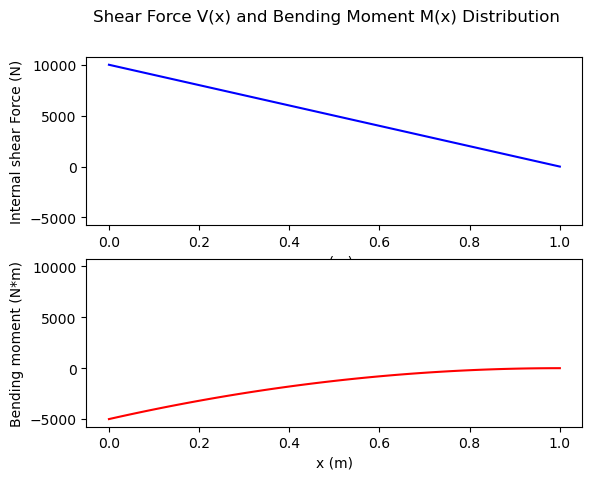

In [4]:
# Figures
# Figures - V(x) & M(x)
plt.figure()
plt.suptitle('Shear Force V(x) and Bending Moment M(x) Distribution')
plt.subplot(2, 1, 1)
plt.plot(x, V_x, 'b')
plt.xlabel('x (m)')
plt.ylabel('Internal shear Force (N)')
plt.subplot(2, 1, 2, sharey = plt.subplot(2, 1, 1))
plt.plot(x, M_x, 'r')
plt.xlabel('x (m)')
plt.ylabel('Bending moment (N*m)')

_at point Q_ 
$$x = \frac{L}{4}$$


Text(0, 0.5, 't(xy) (N/m^2)')

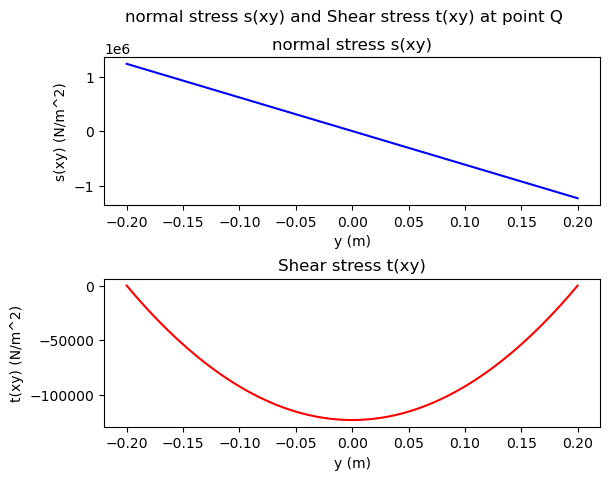

In [5]:
# Calculations
# Sigma & Tau at given point Q
x = 3*L/4 #remaining length after subtracting from the length of the beam
y = np.linspace(-h, h, 100)
sigma = ((-p/2)*((L-x)**2)*y)/((t*h**3)/12)
tau = -(3/2)*((p*(L-x)/A)*(1-(y/h)**2))

plt.figure()
plt.suptitle('normal stress s(xy) and Shear stress t(xy) at point Q')

plt.subplot(2, 1, 1)
plt.title('normal stress s(xy)')
plt.plot(y, sigma, 'b')
plt.xlabel('y (m)')
plt.ylabel('s(xy) (N/m^2)')

plt.subplot(2, 1, 2)
plt.subplots_adjust(hspace=0.5)
plt.title('Shear stress t(xy)')
plt.plot(y, tau, 'r')
plt.xlabel('y (m)')
plt.ylabel('t(xy) (N/m^2)')

_axial stress  sx(x) along the beam top surface (y = -h)_

_txy (x) along the beam centerline (y=0)_


Text(0.5, 1.0, 'Shear stress t(xy) at center of the beam')

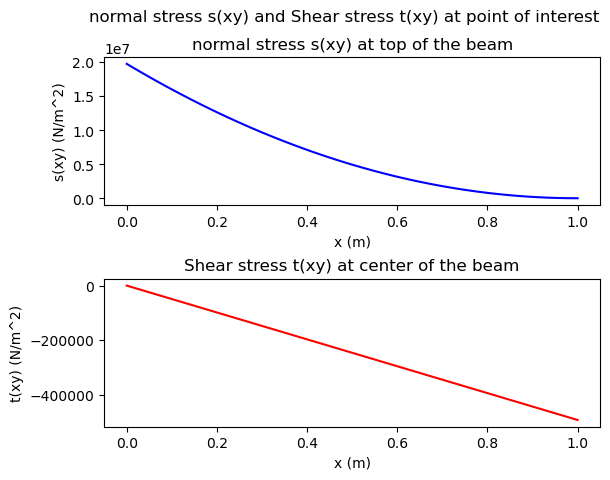

In [6]:
y_center = 0 
y_top = -h
x = np.linspace(0, L, 100)

sigma_top = ((-p/2)*((L-x)**2)*y_top)/((t*h**3)/12)
tau_center = tau = -(3/2)*((p*(x)/A)*(1-(y_center/h)**2))

plt.figure()
plt.suptitle('normal stress s(xy) and Shear stress t(xy) at point of interest')

plt.subplot(2, 1, 1)
plt.plot(x, sigma_top, 'b')
plt.xlabel('x (m)')
plt.ylabel('s(xy) (N/m^2)')
plt.title('normal stress s(xy) at top of the beam')

plt.subplot(2, 1, 2)
plt.subplots_adjust(hspace=0.5)
plt.plot(x, tau_center, 'r')
plt.xlabel('x (m)')
plt.ylabel('t(xy) (N/m^2)')
plt.title('Shear stress t(xy) at center of the beam')


#### 1.B
**Method of elasticity Model**: Consider the following Airy stress function to model beam stress and deformation: 

$$ \Phi = ax^2 + bx^2y + cy^3 + dy^5 + ex^2y^3$$

where coefficients a through e are constants.Determine conditions that must be satisfied so that F is biharmonic, and remind us what is the physical significance of F satisfying the biharmonic equation. Then determine the stress fields, sx(x,y), sy(x,y), and txy (x,y).

$$\tau_{xy} = \frac{\partial^2 \Phi}{\partial x \partial y} = -2bx - 6exy^2 = -(2b + 6ey^2)x$$

_since $\tau_{xy}(h)$ is 0,_ $2b + 6ey^2 = 0, \\$ 
$\therefore b = -3eh^2$

$$\sigma_y = \frac{\partial^2 \Phi}{\partial x^2} = 2a + 2by + 2ey^3$$
substituting with $ b = -3eh^2$, $$\sigma_y  = 2a - 6eh^2y + 2ey^3 = 2a - 2e(3h^2y - y^3)$$ 
$$\sigma_y(h)=0= 2a - 2e(3h^3 - h^3), a = 2h^3e$$
$$\sigma_y(-h) = \frac{-p}{t} = 2a - 2e(-3h^3 - h^3),$$ 
$ \therefore e = \frac{p}{8th^3}, b = \frac{-3p}{8ht}$

$$\tau_{xy} = -(2b+bey^2)x = -\frac{-3px}{4ht} x - \frac{3p}{8ht}xy^2$$

$$\sum M = 0 = \int_{-h}^{h} -y \sigma_x dA + \int_{0} -x \rho dx$$
$$\frac{-px^2}{2} = 4th^3(c + 2h^2d) + 4th^3x^2e$$
$\therefore c = -2h^2d$

$\nabla ^4 \Phi = 0$ (The function is biharmonic if it satisfies the biharmonic equation)

$$\nabla ^4 \Phi = \frac{\partial^4 \Phi}{\partial x^4} + 2\frac{\partial^4 \Phi}{\partial x^2 \partial y^2} + \frac{\partial^4 \Phi}{\partial y^4} = 0$$

$$2(12ey) + 120dy = 0$$
$\therefore d = -\frac{-24e}{110} = \frac{p}{40th^3}$, $c = \frac{p}{20th}$

$$\sigma_x = \frac{\partial^2 \Phi}{\partial y^2} = 6cy + 20dy^4 + 6ex^2 = \frac{-3p}{10h}y + \frac{py^3}{2th^3}y^3 + \frac{3px^2y}{4th^3}$$

$$\sigma_y = 2a - 2e(3h^2y - y^3) = \frac{-p}{2t} + \frac{py}{4th} - \frac{py^3}{8th^3}y^4$$ 
$$

#### 1.C
**Compare the two solutions** by adding the method of elasticity stresses to the plots of stresses in the cross-section and axial stress distributions, as well as comparing the stresses at point Q

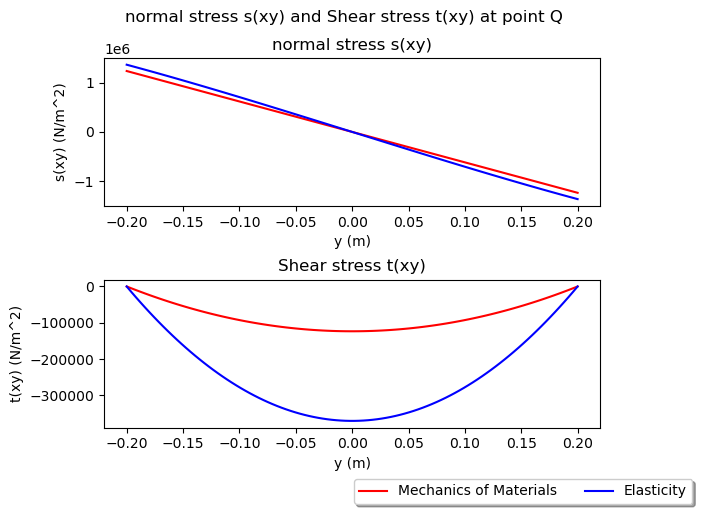

In [7]:
# Calculations
# Sigma & Tau at given point Q
x = 3*L/4 #remaining length after subtracting from the length of the beam
y = np.linspace(-h, h, 100)
sigma_mechmat = ((-p/2)*((L-x)**2)*y)/((t*h**3)/12)
tau_mechmat = -(3/2)*((p*(L-x)/A)*(1-(y/h)**2))
sigma_elasticity = -(3*p*y)/(10*t*h) - (3*p*y*x**2)/(4*t*h**3) + (p*y**3)/(2*t*h**3)
tau_elasticity = -(3*p*x)/(4*t*h) + (3*p*x*y**2)/(4*t*h**3)

plt.figure()
plt.suptitle('normal stress s(xy) and Shear stress t(xy) at point Q')

plt.subplot(2, 1, 1)
plt.title('normal stress s(xy)')
plt.plot(y, sigma_mechmat, 'r', label = 'Mechanics of Materials')
plt.plot(y, sigma_elasticity, color = 'b', label = 'Elasticity')
plt.xlabel('y (m)')
plt.ylabel('s(xy) (N/m^2)')


plt.subplot(2, 1, 2)
plt.subplots_adjust(hspace=0.5)
plt.title('Shear stress t(xy)')
plt.plot(y, tau_mechmat, 'r', label = 'Mechanics of Materials')
plt.plot(y, tau_elasticity, 'b', label = 'Elasticity')
plt.xlabel('y (m)')
plt.ylabel('t(xy) (N/m^2)')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, -0.3),
          ncol=3, fancybox=True, shadow=True)

Text(0.5, 1.0, 'Shear stress t(xy) at center of the beam')

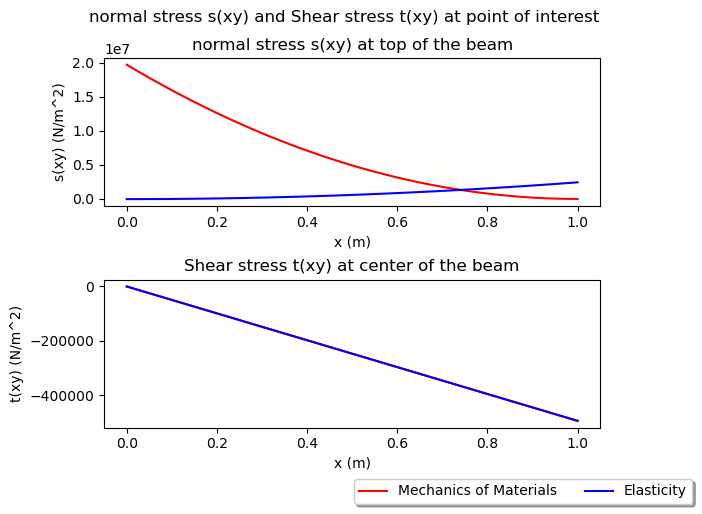

In [8]:
y_center = 0 
y_top = -h
x = np.linspace(0, L, 100)

sigma_top_mechmat = ((-p/2)*((L-x)**2)*y_top)/((t*h**3)/12)
sigma_top_elasticity = -(3*p*y_top)/(10*t*h) - (3*p*y_top*x**2)/(4*t*h**3) + (p*y_top**3)/(2*t*h**3)
tau_center_mechmat = tau = -(3/2)*((p*(x)/A)*(1-(y_center/h)**2))
tau_center_elasticity = -(3*p*x)/(4*t*h) + (3*p*x*y_center**2)/(4*t*h**3)

plt.figure()
plt.suptitle('normal stress s(xy) and Shear stress t(xy) at point of interest')

plt.subplot(2, 1, 1)
plt.plot(x, sigma_top_mechmat, 'r', label = 'Mechanics of Materials')
plt.plot(x, sigma_top_elasticity, 'b', label = 'Elasticity')
plt.xlabel('x (m)')
plt.ylabel('s(xy) (N/m^2)')
plt.title('normal stress s(xy) at top of the beam')

plt.subplot(2, 1, 2)
plt.subplots_adjust(hspace=0.5)
plt.plot(x, tau_center_mechmat, 'r', label = 'Mechanics of Materials')
plt.plot(x, tau_center_elasticity, 'b', label = 'Elasticity')
plt.xlabel('x (m)')
plt.ylabel('t(xy) (N/m^2)')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, -0.3),
          ncol=3, fancybox=True, shadow=True)
plt.title('Shear stress t(xy) at center of the beam')


> As seen on the graph, \
>$\sigma$ = -0.705Mpa\
>$\tau$ = -0.277Mpa

#### 1.D
Which model is **more accurate**, and why? Where are the differences greatest?

> Elasticity method is better(more accurate), as it models the stress in the beam continuously, whereas the mechanics of materials method models the stress in the beam as a series of discrete points. The difference is greatest at the $\sigma$ of the beam

#### 1.E 
Finally, vary the beam length and look at how your plots change. At what length to depth ratio is the maximum difference between the two methods over 10%?

> At an L of 1.2m, the difference between the two methods is over 10%


### _Question 2_
**Help from Andrea, Shreyas, and Isabella**

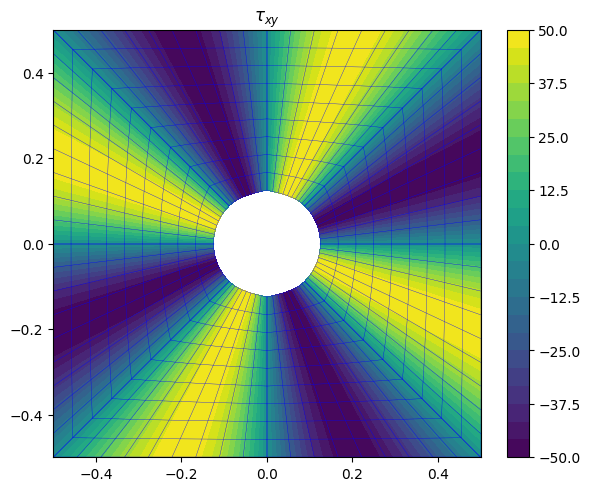

In [26]:
"""
Author: Jacob Lurvey
Adapted from Matlab code by Siva Srinivas Kolukula and modified
     by David Wootton
"""
import numpy as np
import matplotlib.pyplot as plt

# plate side length
L = 1.
# plate side width
W = 1.
# number of elements in xi
M = 10
# number of elements in eta
N = 10
# hole radius
R = 0.25/2
# initial stress in x
Sx0 = 100
# output control
PLOT_GRID = True
PLOT_CONTOURS = True

"""
End user inputs
"""

xiNodes = np.linspace(0., 1., M)
etaNodes = np.linspace(0., 1., N)
X = np.zeros([2, M, N])
Y = np.zeros([2, M, N])

# quarter angle of hole
theta = np.pi/2
# domain splitting line
CMP = [R*np.cos(theta/2.), R*np.sin(theta/2.)]
# global center of plate
origin = np.array([0, 0], dtype=float)
# global bottom reemergent corner
co1 = np.array([R, 0], dtype=float)
# global bottom right corner
co2 = np.array([L/2, 0], dtype=float)
# global top right corner
co3 = np.array([L/2, W/2], dtype=float)
# global top left corner
co4 = np.array([0, W/2], dtype=float)
# global top reemergent corner
co5 = np.array([0, R], dtype=float)


# returns global coordinate of top/bottom bounds corresponding to xi
# inputs: 0 <= xi <= 1 and dom = 0|1
def bottomB(xi, dom):
    if dom == 0:
        x = origin[0] + R*np.cos(np.pi/4*xi)
        y = origin[1] + R*np.sin(np.pi/4*xi)
    elif dom == 1:
        x = origin[0] + R*np.cos(np.pi/4*xi)
        y = origin[1] + R*np.sin(np.pi/4*xi)
    return np.array([x, y])


def topB(xi, dom):
    if dom == 0:
        x = co2[0] + (co3[0] - co2[0]) * xi
        y = co2[1] + (co3[1] - co2[1]) * xi
    elif dom == 1:
        x = co3[0] + (co4[0] - co3[0]) * xi
        y = co3[1] + (co4[1] - co3[1]) * xi
    return np.array([x, y])


# returns global coordinate of left/right bounds corresponding to eta
# inputs: 0 <= eta <= 1 and dom = 0|1
def leftB(eta, dom):
    if dom == 0:
        x = co1[0] + (co2[0] - co1[0]) * eta
        y = co1[1] + (co2[1] - co1[1]) * eta
    elif dom == 1:
        x = co5[0] + (co4[0] - co5[0]) * eta
        y = co5[1] + (co4[1] - co5[1]) * eta
    return np.array([x, y])


def rightB(eta, dom):
    if dom == 0:
        x = CMP[0] + (co3[0] - CMP[0]) * eta
        y = CMP[1] + (co3[1] - CMP[1]) * eta
    elif dom == 1:
        x = CMP[0] + (co3[0] - CMP[0]) * eta
        y = CMP[1] + (co3[1] - CMP[1]) * eta
    return np.array([x, y])


# iterate through nodes in the local coordinate system
for dom in list(range(2)):
    for i in list(range(M)):
        Xi = xiNodes[i]
        for j in list(range(N)):
            Eta = etaNodes[j]
            # performs transfinite interpolation to get the
            # global coordinate corresponding to (xi,eta)
            XY = (1 - Eta) * bottomB(Xi, dom) + Eta * topB(Xi, dom)\
                + (1 - Xi) * leftB(Eta, dom) + Xi * rightB(Eta, dom)\
                - (Xi * Eta * topB(1, dom) + Xi * (1 - Eta)
                   * bottomB(1, dom) + Eta * (1 - Xi) * topB(0, dom)
                   + (1 - Xi) * (1 - Eta) * bottomB(0, dom))
            X[dom, i, j] = XY[0]
            Y[dom, i, j] = XY[1]
            continue
        continue
    continue
wpX = np.array([X, -X, -X, X])
wpY = np.array([Y, Y, -Y, -Y])


def plotGrid(axis, plotX, plotY):
    axis.set_aspect('equal', adjustable='box')
    for quad in list(range(4)):
        for dom in list(range(2)):
            for i in list(range(M)):
                # plot rows of gridlines
                axis.plot(plotX[quad, dom, i, :],
                          plotY[quad, dom, i, :],
                          color='b', linewidth=0.25)
                continue
            for j in list(range(N)):
                # plot columns of gridlines
                axis.plot(plotX[quad, dom, :, j],
                          plotY[quad, dom, :, j],
                          color='b', linewidth=0.25)
                continue
            continue
        continue


def plotContours(axis, plotX, plotY, plotZ):
    for quad in list(range(4)):
        for dom in list(range(2)):
            cset = axis.contourf(plotX[quad, dom, :, :],
                                 plotY[quad, dom, :, :],
                                 plotZ[quad, dom, :, :], levels)
            continue
        continue
    fig.colorbar(cset)


fig, ax = plt.subplots(layout='constrained')

# calculate angle
Q = np.arctan2(wpY, wpX)
sr = 0.5*(Sx0)*(1 + np.cos(2*Q)) 
st = 0.5*(Sx0)*(1 - np.cos(2*Q))
trt = -0.5*(Sx0)*(np.sin(2*Q))

sx = sr*np.cos(-Q)**2 + st*np.sin(Q)**2 - 2*trt*np.sin(-Q)*np.cos(-Q)
sy = sr*np.sin(-Q)**2 + st*np.cos(Q)**2 + 2*trt*np.sin(-Q)*np.cos(-Q)
txy = (sr - st)*np.sin(-Q)*np.cos(-Q) + trt*(np.cos(-Q)**2 - np.sin(-Q)**2)

principal1 = 0.5*(sx + sy) + np.sqrt(((sx - sy)/2)**2 + txy**2)
principal2 = 0.5*(sx + sy) - np.sqrt(((sx - sy)/2)**2 + txy**2)

maxtau = np.sqrt(((sx - sy)/2)**2 + txy**2) 
von_mises = np.sqrt(principal1**2 - principal1*principal2 + principal2**2)


# calculate radial position
Rm = np.sqrt(np.multiply(wpX, wpX) +
             np.multiply(wpY, wpY))


#  Assign Z = whatever quantity you want to plot
Z =  txy

if PLOT_GRID:
    plotGrid(ax, wpX, wpY)
    plt.title('$\\tau_{xy}$')

if PLOT_CONTOURS:
    levels = np.linspace(min(Z.flat), max(Z.flat), 25)
    plotContours(ax, wpX, wpY, Z)

**I was having an error with principal 1, 2, and von misues, will come to the office hours**